Question 1: Regression (MLE and Bayesian)

Part a:

In [312]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from pymc3 import  *
import theano
import pandas as pd
from statsmodels.formula.api import glm as glm_sm
import statsmodels.api as sm
from pandas.plotting import scatter_matrix

In [313]:
from sklearn import linear_model
from sklearn import datasets
import numpy as np
import seaborn as sns

In [314]:
data=pd.read_csv("Q1.csv", header=0)
print(data.head())

        X        Y
0  0.8248  12.4334
1  0.8648  20.7942
2  1.7817  61.5848
3  0.4804  16.4973
4  1.6036  40.7799


In [315]:
X=data.iloc[:,:-1]
Y=data.iloc[:,-1]

In [316]:
lm=linear_model.LinearRegression()
model=lm.fit(X,Y)

In [317]:
model.score(X,Y)

0.7657067417486697

In [318]:
model.intercept_

-0.37414956825405454

In [319]:
model.coef_

array([26.76651892])

Maximum likelihood estimates of α and β is 0.7657067417486697

Part b:

In [ ]:
size = 833
true_intercept = -0.37414956825405454
true_slope = 26.76651892
x = np.linspace(0, 1, size)
true_regression_line = true_intercept + true_slope * x
y = true_intercept + 2.71**x*true_slope + np.random.normal(scale=.5, size=size)
data = {'x': x, 'y': y}

In [ ]:
fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(111, xlabel='x', ylabel='y', title='Generated data and underlying model')
ax.plot(x, y, 'x', label='sampled data')
ax.plot(x, true_regression_line, label='true regression line', lw=2.)
plt.legend(loc=0);

In [ ]:

with Model() as model: 
    # Define priors
    sigma = Normal('sigma', testval=1.)
    intercept = Normal('Intercept', 0, sigma=20)
    x_coeff = Normal('x', 0, sigma=20)

    # Define likelihood
    likelihood = Normal('y', mu=intercept + x_coeff * x,
                        sigma=sigma, observed=y)

    # Inference!
    trace = sample(3000, cores=2) # draw 3000 posterior samples using NUTS sampling

In [412]:

with Model() as model:

    glm.GLM.from_formula('y ~ x', data)
    trace = sample(3000, cores=2) # draw 3000 posterior samples using NUTS sampling

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [sd, x, Intercept]
Sampling 2 chains: 100%|██████████| 7000/7000 [00:25<00:00, 278.32draws/s]
The acceptance probability does not match the target. It is 0.9453003103279016, but should be close to 0.8. Try to increase the number of tuning steps.
The acceptance probability does not match the target. It is 0.962713536208037, but should be close to 0.8. Try to increase the number of tuning steps.


C:\Users\sevda\Anaconda3\lib\site-packages\arviz\plots\backends\matplotlib\distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend_kwargs has not effect in matplotlib.plot_dist"
C:\Users\sevda\Anaconda3\lib\site-packages\arviz\plots\backends\matplotlib\distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend_kwargs has not effect in matplotlib.plot_dist"
C:\Users\sevda\Anaconda3\lib\site-packages\arviz\plots\backends\matplotlib\distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend_kwargs has not effect in matplotlib.plot_dist"
C:\Users\sevda\Anaconda3\lib\site-packages\arviz\plots\backends\matplotlib\distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend

<Figure size 504x504 with 0 Axes>

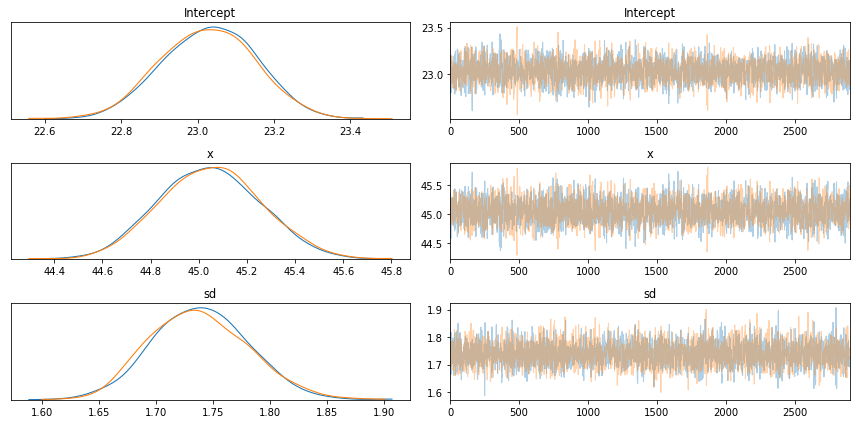

In [413]:
plt.figure(figsize=(7, 7))
traceplot(trace[100:])
plt.tight_layout();

Bayesian estimate for σ: around 1.75
Bayesian estimate for β: around 45.0
Bayesian estimate for α: around 23.0

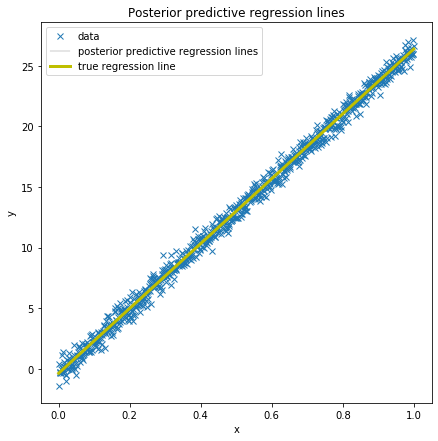

In [325]:
plt.figure(figsize=(7, 7))
plt.plot(x, y, 'x', label='data')
plot_posterior_predictive_glm(trace, samples=100,
                              label='posterior predictive regression lines')
plt.plot(x, true_regression_line, label='true regression line', lw=3., c='y')

plt.title('Posterior predictive regression lines')
plt.legend(loc=0)
plt.xlabel('x')
plt.ylabel('y');

Question 2: Monte Carlo Simulation

Part a:

In [399]:
import random
import numpy

def Y_mut():  #0 represents X chromosome and 1 represents Y chromosome
    
    [[first_chr, sec_chr]]=np.random.randint(low=1,high=4,size=(1,2))
        
    counter=0
    
    if  first_chr==0 and sec_chr==0: #This is XX chromosome
        print('Non-mutated female offspring')
        mutation=0
        non_mut=1
        
    else:
        print('Mutated male offspring') #This is XY chromosome
        mutation=1
        non_mut=0
        counter+=1
        print(counter)
        
    return mutation,non_mut
    
    
        

In [400]:
size=1000
trace=np.zeros((2,size))
for i in range(size):
    trace[0,i], trace[1,i]=Y_mut()
    

Mutated male offspring
1
Mutated male offspring
1
Mutated male offspring
1
Mutated male offspring
1
Mutated male offspring
1
Mutated male offspring
1
Mutated male offspring
1
Mutated male offspring
1
Mutated male offspring
1
Mutated male offspring
1
Mutated male offspring
1
Mutated male offspring
1
Mutated male offspring
1
Mutated male offspring
1
Mutated male offspring
1
Mutated male offspring
1
Mutated male offspring
1
Mutated male offspring
1
Mutated male offspring
1
Mutated male offspring
1
Mutated male offspring
1
Mutated male offspring
1
Mutated male offspring
1
Mutated male offspring
1
Mutated male offspring
1
Mutated male offspring
1
Mutated male offspring
1
Mutated male offspring
1
Mutated male offspring
1
Mutated male offspring
1
Mutated male offspring
1
Mutated male offspring
1
Mutated male offspring
1
Mutated male offspring
1
Mutated male offspring
1
Mutated male offspring
1
Mutated male offspring
1
Mutated male offspring
1
Mutated male offspring
1
Mutated male offspring
1


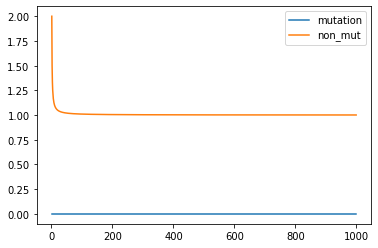

In [398]:
sns.lineplot(range(size), np.cumsum(trace[0,])/range(size), label="mutation")
sns.lineplot(range(size), np.cumsum(trace[1,])/range(size), label="non_mut")

Part b:

In [356]:
generations=numpy.random.poisson(lam=1.0, size=1000)
ex_count=0 #number of extincted generations

for i in generations:
    if i>0:
        print("Number of offspring in this generations is",i)
    
    else:
        print("Mutation has ended because there is no offspring")
        ex_count+=1
        print(ex_count) #gives the total number of extinct generations
print('Probability of extinction in 1000 generations is:',ex_count/1000) #gives the probability of extinction in 1000 generations

Number of offspring in this generations is 1
Number of offspring in this generations is 1
Number of offspring in this generations is 2
Mutation has ended because there is no offspring
1
Number of offspring in this generations is 2
Mutation has ended because there is no offspring
2
Mutation has ended because there is no offspring
3
Mutation has ended because there is no offspring
4
Number of offspring in this generations is 2
Number of offspring in this generations is 2
Number of offspring in this generations is 1
Number of offspring in this generations is 2
Number of offspring in this generations is 1
Mutation has ended because there is no offspring
5
Number of offspring in this generations is 2
Number of offspring in this generations is 1
Mutation has ended because there is no offspring
6
Mutation has ended because there is no offspring
7
Number of offspring in this generations is 3
Mutation has ended because there is no offspring
8
Number of offspring in this generations is 1
Mutatio

Part c:

For lambda=1.8

In [352]:
generations=numpy.random.poisson(lam=1.8, size=1000)
ex_count=0 #number of extincted generations

for i in generations:
    if i>0:
        print("Number of offspring in this generation is",i)
    
    else:
        print("Mutation has ended because there is no offspring")
        ex_count+=1
        print(ex_count) #gives the total number of extinct generations
print('Probability of extinction in 1000 generations is:',ex_count/1000) #gives the probability of extinction in 1000 generations



Number of offspring in this generation is 1
Number of offspring in this generation is 2
Number of offspring in this generation is 1
Mutation has ended because there is no offspring
1
Mutation has ended because there is no offspring
2
Number of offspring in this generation is 3
Number of offspring in this generation is 2
Number of offspring in this generation is 4
Number of offspring in this generation is 1
Number of offspring in this generation is 1
Number of offspring in this generation is 1
Mutation has ended because there is no offspring
3
Mutation has ended because there is no offspring
4
Number of offspring in this generation is 1
Number of offspring in this generation is 2
Mutation has ended because there is no offspring
5
Number of offspring in this generation is 1
Number of offspring in this generation is 2
Number of offspring in this generation is 5
Number of offspring in this generation is 1
Mutation has ended because there is no offspring
6
Number of offspring in this genera

In [ ]:
import matplotlib.pyplot as plt
plt.plot(generations,ex_count)

For lambda=1.9

In [357]:
generations=numpy.random.poisson(lam=1.8, size=1000)
ex_count=0 #number of extincted generations

for i in generations:
    if i>0:
        print("Number of offspring in this generation is",i)
    
    else:
        print("Mutation has ended because there is no offspring")
        ex_count+=1
        print(ex_count) #gives the total number of extinct generations
print('Probability of extinction in 1000 generations is:',ex_count/1000) #gives the probability of extinction in 1000 generations



Number of offspring in this generation is 2
Number of offspring in this generation is 1
Number of offspring in this generation is 2
Number of offspring in this generation is 1
Number of offspring in this generation is 1
Number of offspring in this generation is 4
Mutation has ended because there is no offspring
1
Number of offspring in this generation is 3
Number of offspring in this generation is 4
Number of offspring in this generation is 3
Number of offspring in this generation is 1
Number of offspring in this generation is 1
Number of offspring in this generation is 3
Number of offspring in this generation is 2
Number of offspring in this generation is 3
Number of offspring in this generation is 2
Number of offspring in this generation is 2
Number of offspring in this generation is 1
Number of offspring in this generation is 2
Number of offspring in this generation is 2
Number of offspring in this generation is 1
Number of offspring in this generation is 4
Number of offspring in th

In [ ]:
import matplotlib.pyplot as plt
plt.plot(generations,ex_count)

For lambda=2.0

In [359]:
generations=numpy.random.poisson(lam=1.8, size=1000)
ex_count=0 #number of extincted generations

for i in generations:
    if i>0:
        print("Number of offspring in this generation is",i)
    
    else:
        print("Mutation has ended because there is no offspring")
        ex_count+=1
        print(ex_count) #gives the total number of extinct generations
print('Probability of extinction in 1000 generations is:',ex_count/1000) #gives the probability of extinction in 1000 generations



Number of offspring in this generation is 4
Number of offspring in this generation is 1
Number of offspring in this generation is 2
Number of offspring in this generation is 1
Number of offspring in this generation is 1
Number of offspring in this generation is 3
Number of offspring in this generation is 1
Number of offspring in this generation is 1
Number of offspring in this generation is 4
Mutation has ended because there is no offspring
1
Number of offspring in this generation is 1
Number of offspring in this generation is 6
Number of offspring in this generation is 1
Number of offspring in this generation is 3
Number of offspring in this generation is 1
Number of offspring in this generation is 3
Number of offspring in this generation is 4
Number of offspring in this generation is 2
Mutation has ended because there is no offspring
2
Number of offspring in this generation is 2
Number of offspring in this generation is 1
Number of offspring in this generation is 2
Number of offsprin

In [ ]:
import matplotlib.pyplot as plt
plt.plot(generations,ex_count)

For lambda=2.1

In [360]:
generations=numpy.random.poisson(lam=1.8, size=1000)
ex_count=0 #number of extincted generations

for i in generations:
    if i>0:
        print("Number of offspring in this generation is",i)
    
    else:
        print("Mutation has ended because there is no offspring")
        ex_count+=1
        print(ex_count) #gives the total number of extinct generations
print('Probability of extinction in 1000 generations is:',ex_count/1000) #gives the probability of extinction in 1000 generations



Number of offspring in this generation is 2
Number of offspring in this generation is 1
Mutation has ended because there is no offspring
1
Number of offspring in this generation is 4
Number of offspring in this generation is 2
Number of offspring in this generation is 1
Number of offspring in this generation is 2
Mutation has ended because there is no offspring
2
Number of offspring in this generation is 3
Number of offspring in this generation is 2
Number of offspring in this generation is 2
Mutation has ended because there is no offspring
3
Number of offspring in this generation is 3
Number of offspring in this generation is 1
Mutation has ended because there is no offspring
4
Number of offspring in this generation is 1
Number of offspring in this generation is 1
Number of offspring in this generation is 2
Number of offspring in this generation is 3
Number of offspring in this generation is 2
Number of offspring in this generation is 2
Number of offspring in this generation is 1
Numb

In [ ]:
import matplotlib.pyplot as plt
plt.plot(generations,ex_count)

For lambda=2.2

In [361]:
generations=numpy.random.poisson(lam=1.8, size=1000)
ex_count=0 #number of extincted generations

for i in generations:
    if i>0:
        print("Number of offspring in this generation is",i)
    
    else:
        print("Mutation has ended because there is no offspring")
        ex_count+=1
        print(ex_count) #gives the total number of extinct generations
print('Probability of extinction in 1000 generations is:',ex_count/1000) #gives the probability of extinction in 1000 generations



Number of offspring in this generation is 3
Number of offspring in this generation is 1
Number of offspring in this generation is 1
Number of offspring in this generation is 3
Number of offspring in this generation is 1
Number of offspring in this generation is 3
Number of offspring in this generation is 1
Number of offspring in this generation is 2
Number of offspring in this generation is 2
Number of offspring in this generation is 1
Number of offspring in this generation is 5
Number of offspring in this generation is 1
Number of offspring in this generation is 3
Number of offspring in this generation is 5
Number of offspring in this generation is 1
Number of offspring in this generation is 1
Number of offspring in this generation is 1
Number of offspring in this generation is 3
Number of offspring in this generation is 1
Number of offspring in this generation is 4
Number of offspring in this generation is 2
Number of offspring in this generation is 3
Number of offspring in this gene

In [ ]:
import matplotlib.pyplot as plt
plt.plot(generations,ex_count)